In [3]:
%load_ext autoreload
%autoreload 2
from geolifeclef.utils import get_spark
from pyspark.sql import functions as F

spark = get_spark()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


24/05/24 05:17:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
metadata = spark.read.parquet(
    "gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_clean/v1"
).filter(F.col("dataset") != "po")
metadata.printSchema()
metadata.show()

root
 |-- dataset: string (nullable = true)
 |-- surveyId: integer (nullable = true)
 |-- lat_proj: double (nullable = true)
 |-- lon_proj: double (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- geoUncertaintyInM: double (nullable = true)
 |-- speciesId: double (nullable = true)



+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+---------+
| dataset|surveyId|           lat_proj|            lon_proj|      lat|     lon|year|geoUncertaintyInM|speciesId|
+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+---------+
|pa_train| 3707965|-1614858.9153893404| 1.690952987363603E7| 57.04466| 9.05137|2017|             10.0|   7739.0|
|pa_train|  331966|-1882413.1908692368|1.5621125512619067E7| 46.32355|  13.909|2020|              0.0|   2322.0|
|pa_train| 2118745| -1581919.826367132|1.6785045224298324E7| 56.27395|10.46924|2019|             10.0|   2885.0|
|pa_train|  226994|-1604956.8148379833| 1.690090014821878E7| 57.02554| 9.25348|2018|             10.0|    581.0|
|pa_train|  473228| -1552158.289162738|1.6687220463388722E7| 55.66891|11.59059|2017|             10.0|   9816.0|
|pa_train| 3496757|-1642643.0405459898|1.6883943525084995E7|  56.7358| 8.88955|2019|            

In [5]:
metadata.filter(F.col("surveyId") == 725124).show()

+--------+--------+------------------+--------------------+--------+-------+----+-----------------+---------+
| dataset|surveyId|          lat_proj|            lon_proj|     lat|    lon|year|geoUncertaintyInM|speciesId|
+--------+--------+------------------+--------------------+--------+-------+----+-----------------+---------+
|pa_train|  725124|-1745914.419671583|1.6793605783911727E7|55.62505|8.26894|2019|             10.0|  10223.0|
|pa_train|  725124|-1745914.419671583|1.6793605783911727E7|55.62505|8.26894|2019|             10.0|   8151.0|
|pa_train|  725124|-1745914.419671583|1.6793605783911727E7|55.62505|8.26894|2019|             10.0|   8807.0|
|pa_train|  725124|-1745914.419671583|1.6793605783911727E7|55.62505|8.26894|2019|             10.0|     53.0|
|pa_train|  725124|-1745914.419671583|1.6793605783911727E7|55.62505|8.26894|2019|             10.0|   2025.0|
|pa_train|  725124|-1745914.419671583|1.6793605783911727E7|55.62505|8.26894|2019|             10.0|   9647.0|
|pa_train|

In [6]:
metadata.filter(F.col("surveyId") == 1599781).show()

+--------+--------+-------------------+--------------------+--------+-------+----+-----------------+---------+
| dataset|surveyId|           lat_proj|            lon_proj|     lat|    lon|year|geoUncertaintyInM|speciesId|
+--------+--------+-------------------+--------------------+--------+-------+----+-----------------+---------+
|pa_train| 1599781|-1746495.5052598761|1.6792945766220003E7|55.61772|8.26672|2019|             10.0|   8494.0|
|pa_train| 1599781|-1746495.5052598761|1.6792945766220003E7|55.61772|8.26672|2019|             10.0|   1951.0|
|pa_train| 1599781|-1746495.5052598761|1.6792945766220003E7|55.61772|8.26672|2019|             10.0|    254.0|
|pa_train| 1599781|-1746495.5052598761|1.6792945766220003E7|55.61772|8.26672|2019|             10.0|   3161.0|
|pa_train| 1599781|-1746495.5052598761|1.6792945766220003E7|55.61772|8.26672|2019|             10.0|   5900.0|
|pa_train| 1599781|-1746495.5052598761|1.6792945766220003E7|55.61772|8.26672|2019|             10.0|   5420.0|
|

In [6]:
from pyspark.sql import functions as F

In [13]:
metadata.filter(F.col("dataset") != "po").select("surveyId").distinct().count()

93703

In [26]:
df = spark.read.parquet(
    "gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/combined_timeseries_v3"
)
df.show()

+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|surveyId| dataset|           lat_proj|            lon_proj|      lat|     lon|year|geoUncertaintyInM|speciesId|          TimeSeries|             ts_blue|            ts_green|              ts_nir|              ts_red|            ts_swir1|            ts_swir2|
+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    4210|pa_train|-1644207.1223485535| 1.669148485768465E7| 55.31917|10.35217|2019|             10.0|   2922.0|[5.0, 6.0, 3.0, 7...|[920.0, 6.7140484...|[2034.0, -13.1343...|[8780.0, 13.23476...|[1646.0, -28.7461...|[60

In [27]:
df.select("surveyId").distinct().count()

93703

In [17]:
merge_df = metadata.join(df, (metadata.surveyId == df.surveyId), "left_anti")
merge_df.show()

+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+---------+
| dataset|surveyId|           lat_proj|            lon_proj|      lat|     lon|year|geoUncertaintyInM|speciesId|
+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+---------+
|pa_train| 3707965|-1614858.9153893404| 1.690952987363603E7| 57.04466| 9.05137|2017|             10.0|   7739.0|
|pa_train|  331966|-1882413.1908692368|1.5621125512619067E7| 46.32355|  13.909|2020|              0.0|   2322.0|
|pa_train|  226994|-1604956.8148379833| 1.690090014821878E7| 57.02554| 9.25348|2018|             10.0|    581.0|
|pa_train| 3496757|-1642643.0405459898|1.6883943525084995E7|  56.7358| 8.88955|2019|             10.0|  10892.0|
|pa_train| 2121546|-2533850.6953945193|1.5190077080153365E7| 40.85993|9.206911|2018|             10.0|   8106.0|
|pa_train| 2458684|-2651174.0107524125|1.6443841275734857E7| 49.05266| 0.80791|2019|            

In [19]:
df.filter(F.col("surveyId") == 3707965).show()

+--------+-------+--------+--------+---+---+----+-----------------+---------+----------+----+-----+---+---+-----+-----+
|surveyId|dataset|lat_proj|lon_proj|lat|lon|year|geoUncertaintyInM|speciesId|TimeSeries|blue|green|nir|red|swir1|swir2|
+--------+-------+--------+--------+---+---+----+-----------------+---------+----------+----+-----+---+---+-----+-----+
+--------+-------+--------+--------+---+---+----+-----------------+---------+----------+----+-----+---+---+-----+-----+



In [23]:
blue = spark.read.parquet(
    "gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/GLC24-PO-train-landsat-time-series-blue/GLC24-PO-train-landsat-time-series-blue"
)
blue.show()

+--------+--------------------+--------------------+
|surveyId|          TimeSeries|                 DCT|
+--------+--------------------+--------------------+
|  748008|[12.0, 10.0, 9.0,...|[2074.0, -121.424...|
|  748009|[17.0, 21.0, 19.0...|[3078.0, 9.272144...|
|  748010|[5.0, 3.0, 2.0, 2...|[672.0, -14.78262...|
|  748011|[3.0, 4.0, 4.0, 3...|[564.0, -8.31281,...|
|  748012|[12.0, 4.0, 4.0, ...|[1214.0, -55.1873...|
|  748013|[9.0, 12.0, 10.0,...|[1772.0, 26.71977...|
|  748014|[24.0, 25.0, 24.0...|[3170.0, 727.5371...|
|  748015|[11.0, 12.0, 12.0...|[1948.0, 21.81427...|
|  748016|[7.0, 6.0, 13.0, ...|[1252.0, 9.242264...|
|  748017|[8.0, 6.0, 7.0, 6...|[1336.0, 3.431847...|
|  748018|[8.0, 9.0, 7.0, 7...|[1226.0, 49.51976...|
|  748019|[14.0, 16.0, 14.0...|[1806.0, 196.4096...|
|  748020|[25.0, 26.0, 25.0...|[9158.0, -2203.90...|
|  748021|[7.0, 9.0, 9.0, 8...|[1492.0, -130.454...|
|  748022|[11.0, 8.0, 10.0,...|[2512.0, -95.0330...|
|  748023|[5.0, 6.0, 8.0, 1...|[1044.0, 31.748

In [25]:
blue.filter(F.col("surveyId") == 748008).show()

+--------+--------------------+--------------------+
|surveyId|          TimeSeries|                 DCT|
+--------+--------------------+--------------------+
|  748008|[12.0, 10.0, 9.0,...|[2074.0, -121.424...|
+--------+--------------------+--------------------+



In [5]:
import os

In [7]:
os.path.exists(
    "/mnt/data/geolifeclef-2024/data/models/baseline_xgboost_naive/log_bin_2=4"
)

True

In [5]:
base_result = spark.read.json(
    "/mnt/data/geolifeclef-2024/data/models/baseline_xgboost_naive/v1_test/perf"
)
base_result.show()

+--------------------+--------------+--------------------+-----------------+
|         avg_metrics|   metric_name|         std_metrics|       train_time|
+--------------------+--------------+--------------------+-----------------+
|[0.8970338870364115]|microF1Measure|[0.8970338870364115]|85.34626088699952|
+--------------------+--------------+--------------------+-----------------+



In [3]:
result = spark.read.json(
    "/mnt/data/geolifeclef-2024/data/models/baseline_xgboost_naive/log_bin_2=0/perf"
)
result.show()

+--------------------+--------------+--------------------+-----------------+
|         avg_metrics|   metric_name|         std_metrics|       train_time|
+--------------------+--------------+--------------------+-----------------+
|[6.91562932226832...|microF1Measure|[6.91562932226832...|705.3210157110002|
+--------------------+--------------+--------------------+-----------------+



In [8]:
from pyspark.sql import functions as F
import numpy as np

species_count = metadata.groupBy("speciesId").count()
species_count.orderBy(species_count["count"].desc()).show()
print(species_count.count())

+---------+-----+
|speciesId|count|
+---------+-----+
|    540.0|27928|
|   4397.0|25013|
|    254.0|23336|
|   2885.0|23270|
|   4499.0|21036|
|  10317.0|19883|
|  11140.0|19393|
|   1964.0|19334|
|  10600.0|19311|
|  10073.0|19242|
|  10255.0|18643|
|   9816.0|18360|
|   8208.0|17022|
|  11195.0|16968|
|   6310.0|16826|
|   6962.0|16659|
|   6079.0|16398|
|    963.0|15771|
|   8818.0|15566|
|   6643.0|15508|
+---------+-----+
only showing top 20 rows



10359


In [7]:
species_count["count"]

NameError: name 'species_count' is not defined

In [ ]:
os.cpu_count()

4

In [19]:
max_count = species_count.agg(F.max("count").alias("Max"))
min_count = species_count.agg(F.min("count").alias("Min"))

max_value = max_count.first().Max
min_value = min_count.first().Min

print(max_count.first().Max)
print(min_count.first().Min)

min_row = species_count.filter(species_count["count"] == max_count.first().Max)
max_row = species_count.filter(species_count["count"] == min_count.first().Min)

# Show the results
min_row.show()
max_row.show()

27928
1
+---------+-----+
|speciesId|count|
+---------+-----+
|    540.0|27928|
+---------+-----+

+---------+-----+
|speciesId|count|
+---------+-----+
|   9753.0|    1|
|  10681.0|    1|
|     70.0|    1|
|   3448.0|    1|
|   8144.0|    1|
|   9762.0|    1|
|   1551.0|    1|
|   9650.0|    1|
|   7136.0|    1|
|  11118.0|    1|
|    928.0|    1|
|   6016.0|    1|
|  10202.0|    1|
|   7265.0|    1|
|   4571.0|    1|
|   6185.0|    1|
|    588.0|    1|
|   8504.0|    1|
|   4119.0|    1|
|   8982.0|    1|
+---------+-----+
only showing top 20 rows



In [6]:
bin_edges = np.linspace(min_value, max_value, 14).tolist()
bin_edges

[1.0,
 2149.230769230769,
 4297.461538461538,
 6445.692307692307,
 8593.923076923076,
 10742.153846153846,
 12890.384615384613,
 15038.615384615383,
 17186.846153846152,
 19335.076923076922,
 21483.30769230769,
 23631.53846153846,
 25779.769230769227,
 27928.0]

In [7]:
freq = species_count.select("count").rdd.flatMap(lambda x: x)

In [8]:
histogram_bins, histogram_counts = freq.histogram(bin_edges)

print("Bin edges: ", histogram_bins)
print("Counts: ", histogram_counts)

Bin edges:  [1.0, 2149.230769230769, 4297.461538461538, 6445.692307692307, 8593.923076923076, 10742.153846153846, 12890.384615384613, 15038.615384615383, 17186.846153846152, 19335.076923076922, 21483.30769230769, 23631.53846153846, 25779.769230769227, 27928.0]
Counts:  [9388, 371, 403, 100, 43, 19, 14, 9, 5, 3, 2, 1, 1]


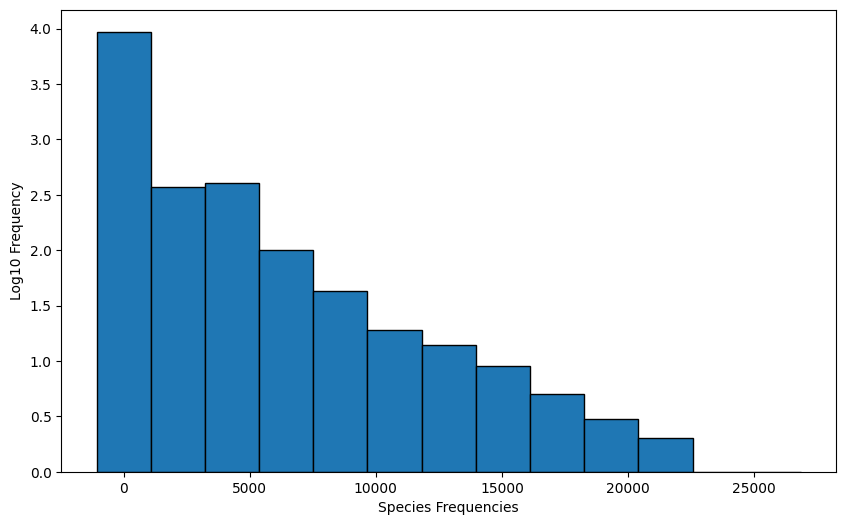

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.bar(
    histogram_bins[:-1],
    [np.log10(counts) for counts in histogram_counts],
    width=np.diff(histogram_bins),
    edgecolor="black",
)
plt.xlabel("Species Frequencies")
plt.ylabel("Log10 Frequency")
plt.show()

In [9]:
log_base = 2
log_df = species_count.withColumn(
    f"log_bin_{log_base}", F.floor(F.log10(F.col("count")) / F.log10(F.lit(log_base)))
)
log_df.show()

+---------+-----+---------+
|speciesId|count|log_bin_2|
+---------+-----+---------+
|  10024.0| 9167|       13|
|   4142.0| 3826|       11|
|  11028.0| 1971|       10|
|    305.0| 4815|       12|
|   7115.0| 2292|       11|
|   3597.0|  491|        8|
|   1051.0| 5922|       12|
|   9923.0|  417|        8|
|   1761.0| 5835|       12|
|   6067.0| 2540|       11|
|   6433.0|   61|        5|
|   7171.0|  659|        9|
|    299.0|  759|        9|
|   7782.0|  289|        8|
|    558.0|  148|        7|
|  10930.0|   49|        5|
|    769.0|   18|        4|
|   6653.0|  157|        7|
|   6765.0|  213|        7|
|    596.0|   55|        5|
+---------+-----+---------+
only showing top 20 rows



In [31]:
metadata_count = metadata.join(log_df, on="speciesId", how="inner")
count_bin = metadata_count.groupBy("log_bin_2").count()
count_bin.show()

+---------+-------+
|log_bin_2|  count|
+---------+-------+
|        0|   1526|
|        7| 117933|
|        6|  62418|
|        9| 342416|
|        5|  36173|
|        1|   3024|
|       10| 577941|
|        3|  10592|
|       12|2754912|
|        8| 205047|
|       11|1111622|
|        2|   5553|
|        4|  22713|
|       13| 972942|
|       14| 338622|
+---------+-------+



0        1526
1        3024
2        5553
3       10592
4       22713
5       36173
6       62418
7      117933
8      205047
9      342416
10     577941
11    1111622
12    2754912
13     972942
14     338622
Name: count, dtype: int64


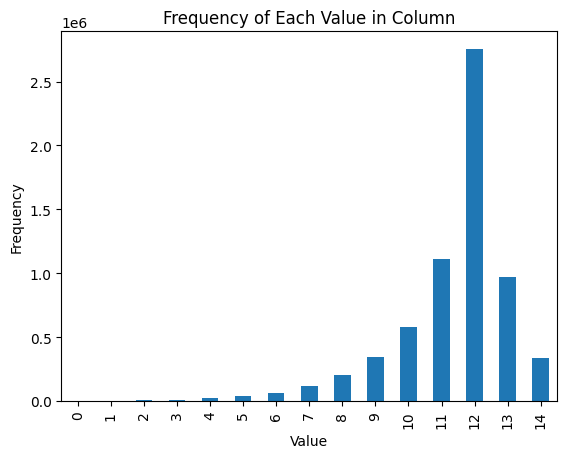

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt

count_bin = count_bin.sort("log_bin_2")
count_pd = count_bin.toPandas()

value_counts = count_pd["count"]
print(value_counts)
# Create a bar plot
value_counts.plot(kind="bar")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Frequency of Each Value in Column")
plt.show()
plt.savefig("Frequency Graph")

In [24]:
import numpy as np

Bin edges:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Counts:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
metadata_count.filter(metadata_count.speciesId == 10024).show()

+---------+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+-----+---------+
|speciesId| dataset|surveyId|           lat_proj|            lon_proj|      lat|     lon|year|geoUncertaintyInM|count|log_bin_2|
+---------+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+-----+---------+
|  10024.0|pa_train| 3493784|-1636995.1215402242|  1.63134377355146E7| 52.50813|13.00049|2017|              5.0| 9167|       13|
|  10024.0|      po|   59557|-1594713.3380299946|1.6878330236158393E7| 56.90557|9.571581|2021|              3.0| 9167|       13|
|  10024.0|      po|  545236|-1680000.0019777962| 1.675711155307765E7| 55.64893|9.396588|2019|              3.0| 9167|       13|
|  10024.0|pa_train| 1727576| -2101717.142513414|1.6516045479598204E7|52.071601|6.086648|2017|              3.0| 9167|       13|
|  10024.0|pa_train| 1868866|-1504141.4227291741|  1.66830569039452E7| 55.83221|12.26147|2018|   

In [61]:
!gsutil rm -r gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/*

Removing gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/#1715406901939546...
Removing gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/_SUCCESS#1715406902119203...
Removing gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=0/part-00000-258bcaab-9d0e-4aab-b175-1347e636b05c.c000.snappy.parquet#1715406888605441...
Removing gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=0/part-00001-258bcaab-9d0e-4aab-b175-1347e636b05c.c000.snappy.parquet#1715406891348213...
/ [4 objects]                                                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m rm ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Removing gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=0/part-00002-258bcaab-9d0e-4aab-b175-1347e636b05c.c0

In [49]:
log_base_name = f"log_bin_{log_base}"
output_path = "gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split"

metadata_count.write.partitionBy(log_base_name).format("parquet").save(output_path)

In [62]:
!gsutil ls gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split

gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/_SUCCESS
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=0/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=1/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=10/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=11/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=12/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=13/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=14/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=2/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=3/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=4/
gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=5/
gs://dsgt-clef-geolifeclef-2024/data

In [31]:
import os
from google.cloud import storage


def list_blobs_with_prefix(bucket_name, prefix, delimiter="/"):
    """List all blobs in a bucket that begin with the prefix."""
    storage_client = storage.Client()

    # Ensure prefix ends with a delimiter if we're trying to list "directories"
    if not prefix.endswith(delimiter):
        prefix += delimiter

    blobs = storage_client.list_blobs(bucket_name, prefix=prefix, delimiter=delimiter)

    for _ in blobs:
        pass

    prefixes = []
    if hasattr(blobs, "prefixes"):
        for prefix in blobs.prefixes:
            if prefix.endswith(delimiter):
                prefix = prefix[:-1]
            prefixes.append(os.path.join("gs://" + bucket_name, prefix))
    else:
        print("No subdirectories found.")

    return prefixes


# Example usage
bucket_name = "dsgt-clef-geolifeclef-2024"
prefix = "data/processed/metadata_split"
delimiter = "/"  # This helps to list "directories"

directories = list_blobs_with_prefix(bucket_name, prefix, delimiter)
directories

['gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=3',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=0',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=7',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=2',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=11',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=5',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=9',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=6',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=1',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=12',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=14',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_split/log_bin_2=13',
 'gs://dsgt-clef-geolifeclef-2024/data/processed/metadata_sp

In [40]:
test_df = spark.read.parquet(directories[7])
test_df.show()

+---------+-------+--------+-------------------+--------------------+--------+---------+----+-----------------+-----+
|speciesId|dataset|surveyId|           lat_proj|            lon_proj|     lat|      lon|year|geoUncertaintyInM|count|
+---------+-------+--------+-------------------+--------------------+--------+---------+----+-----------------+-----+
|   7313.0|     po|  265272| -2290378.181832812| 1.594915249309798E7|47.25988| 7.724804|2021|            64.89|   69|
|   5776.0|     po|  168512|-1366058.7420759553|1.7148445478555515E7|59.89579| 10.52286|2021|             10.0|   67|
|   7313.0|     po| 1143526| -1456174.168985866|1.6641094676949449E7|55.70369| 13.20311|2018|             10.0|   69|
|   7313.0|     po| 1567398| -2266047.021621731|1.6435127643072981E7|50.77511|  4.84362|2021|              2.0|   69|
|   5776.0|     po|  926006|-1363802.9619077828|1.7131540385843247E7|59.78042| 10.70336|2017|             50.0|   67|
|   7313.0|     po| 1546882|-2232181.1081293416|1.593238

In [41]:
sorted([val.surveyId for val in test_df.select("surveyId").distinct().collect()])

[146,
 276,
 374,
 402,
 415,
 461,
 489,
 527,
 615,
 851,
 970,
 996,
 1155,
 1294,
 1376,
 1396,
 1403,
 1469,
 1486,
 1603,
 1642,
 1650,
 1719,
 1741,
 2179,
 2256,
 2369,
 2472,
 2499,
 2599,
 2627,
 2775,
 2795,
 2809,
 2811,
 2884,
 2944,
 3014,
 3070,
 3209,
 3311,
 3312,
 3508,
 3526,
 3566,
 3594,
 3619,
 3661,
 3684,
 3783,
 3887,
 3898,
 4186,
 4231,
 4514,
 4544,
 4580,
 4606,
 4845,
 5316,
 5386,
 5456,
 5508,
 5518,
 5719,
 5948,
 6045,
 6188,
 6376,
 6414,
 6444,
 6519,
 6600,
 6799,
 7186,
 7305,
 7355,
 7508,
 7865,
 7866,
 7917,
 8083,
 8146,
 8239,
 8352,
 8543,
 8563,
 8652,
 8669,
 8807,
 8828,
 8837,
 8872,
 9154,
 9270,
 9321,
 9325,
 9339,
 9402,
 9413,
 9452,
 9493,
 9529,
 9554,
 9576,
 9639,
 9707,
 9759,
 9789,
 9805,
 9811,
 9934,
 9943,
 10108,
 10212,
 10294,
 10548,
 10611,
 10629,
 10666,
 10826,
 10900,
 10925,
 11035,
 11039,
 11134,
 11260,
 11295,
 11579,
 11602,
 11682,
 11719,
 11788,
 11823,
 11897,
 11925,
 11996,
 12000,
 12340,
 12372,
 1241

In [42]:
stats = spark.read.csv(
    "/mnt/data/geolifeclef-2024/data/models/baseline_xgboost_naive/log_bin_2=0/multilabel_stats
)

In [51]:
stats.show()

+------+------------------+-------------------+-------+
|   _c0|               _c1|                _c2|dataset|
+------+------------------+-------------------+-------+
| count|              1509|               1509|  train|
|  mean|1974481.2200132539| 1.0112657388999338|  train|
|stddev|1138734.6120300672|0.12826241967749538|  train|
|   min|              2448|                  1|  train|
|   max|           3918038|                  4|  train|
+------+------------------+-------------------+-------+



In [54]:
temp = spark.read.json(
    "/mnt/data/geolifeclef-2024/data/models/baseline_xgboost_naive/log_bin_2=7/perf"
)

In [55]:
temp.show(truncate=False)

+---------------------+--------------+---------------------+------------------+
|avg_metrics          |metric_name   |std_metrics          |train_time        |
+---------------------+--------------+---------------------+------------------+
|[0.20399461603209876]|microF1Measure|[0.20399461603209876]|1031.4420894989998|
+---------------------+--------------+---------------------+------------------+



In [23]:
df = None
path = "/mnt/data/geolifeclef-2024/data/models/baseline_xgboost_naive"
for filename in os.listdir(path):
    if filename != "_SUCCESS":
        cur = spark.read.json(path + "/" + filename + "/perf")
        break
        # if df is None:
        #     df = cur
        # else:
        #     df.union(cur)
df.show()

AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/mnt/data/geolifeclef-2024/data/models/baseline_xgboost_naive/log_bin_2=8/perf.